In [1]:
###Modules used
#openweathermapy.core
#pandas
#matplotlib
#numpy
#datetime
#requests
#json

###API's used (API keys used for google as well as openweather)
# "https://maps.googleapis.com/maps/api/geocode/json"
# "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
# "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
#Instead of openweathermapy API, wrapper is 

#Additional APIs that could be used
#https://maps.googleapis.com/maps/api/place/details/json?
#https://maps.googleapis.com/maps/api/distancematrix/json?

In [2]:
import requests
import json
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openweathermapy.core as owm

from config import api_key
from config import gkey
#from pprint import pprint

#%matplotlib notebook

In [3]:
#Read all the Weather csv files 
main = "Resources/Indoor_Outdoor_Weather - main.csv"
main_df = pd.read_csv(main, encoding="ISO-8859-1")
Atmosphere = "Resources/Indoor_Outdoor_Weather - Atmosphere.csv"
atmosphere_df = pd.read_csv(Atmosphere, encoding="ISO-8859-1")
Drizzle= "Resources/Indoor_Outdoor_Weather - Drizzle.csv"
drizzle_df = pd.read_csv(Drizzle, encoding="ISO-8859-1")
Rain = "Resources/Indoor_Outdoor_Weather - Rain.csv"
rain_df = pd.read_csv(Rain, encoding="ISO-8859-1")
Snow ="Resources/Indoor_Outdoor_Weather - Snow.csv"
snow_df = pd.read_csv(Snow, encoding="ISO-8859-1")

#https://developers.google.com/places/web-service/supported_types
#Read all the activities files
Acty_In = pd.read_excel("Resources/Indoor.xlsx")
Acty_Out = pd.read_excel("Resources/Outdoor.xlsx")
Acty_EveIn = pd.read_excel("Resources/EveIndoor.xlsx")
Acty_EveInOut = pd.read_excel("Resources/EveInOut.xlsx")
Acty_NightIn = pd.read_excel("Resources/NightIndoor.xlsx")
Acty_NightInOut = pd.read_excel("Resources/NightInOut.xlsx")

In [4]:
#Converting the actvity dataframes into list
Acty_Inlist = Acty_In["Indoor"].tolist()
Acty_Outlist = Acty_Out["Outdoor"].tolist()
Acty_EveInlist = Acty_EveIn["EveIndoor"].tolist()
Acty_EveInOutlist = Acty_EveInOut["EveInOut"].tolist()
Acty_NightInlist = Acty_NightIn["NightIndoor"].tolist()
Acty_NightInOutlist = Acty_NightInOut["NightInOut"].tolist()

In [5]:
#Input the target city and state
target_city = input("Enter city & state in the format 'city,state: ")

Enter city & state in the format 'city,state: Dallas, Tx


In [6]:
#Split the input to get the city
City = target_city.split(",")[0]

#Create settings dictionary for units & appid
settings = {"units": "metric", "appid": api_key}

In [7]:
#Get current weather
current_weather = owm.get_current(City, **settings)
#print(f"Current weather object: {current_weather}.")

#Get weather forecast
#forecast_weather = owm.get_forecast_hourly(City, **settings)
#pprint(forecast_weather)

summary = ["name", 'weather', "main", "wind", 'clouds']
data = current_weather(*summary)
#print(f"The current weather summary is : {data}.")

currentmain = data[1][0]["main"]
#print (currentmain)

temp = data[2]['temp']
#print (temp)

humidity = data[2]['humidity']
#print (humidity)

windspeed = data[3]["speed"]
#print(windspeed)

currentdesc = data[1][0]['description']
#print (currentdesc)

In [9]:
Finalresult = ""
Words_of_advice = " "
 
# loop through main weather types to determine if outdoor or indoor activities
if (currentmain=="Thunderstorms") or (currentmain=="Clouds") or (currentmain=="Clear") or (currentmain=="Mist"):
    if (currentmain=="Thunderstorms"):
        print(f'Staysafe!!! {currentmain} in the {City}')
        Words_of_advice = "Staysafe!!! "+ currentmain + " in the " + City
        #print(Words_of_advice)
        Finalresult="indoor"
        print(Finalresult)
    else:
        Finalresult="outdoor"
        print(Finalresult)
else:
    if currentmain=="Rain":
    #read rain.df to find which
        for index, desctype in rain_df.iterrows():
            if currentdesc == desctype["Description"]:
                Finalresult=rain_df["Rating"][index]
                print(Finalresult)
    elif currentmain=="Snow" :
        #read snow.df to find which
        for index, desctype in snow_df.iterrows():
            if currentdesc == desctype["Description"]:
                Finalresult=desctype["Rating"][index]
                print(Finalresult)
    elif currentmain=="Drizzle" :
        #read drizzledf to find which
        for index, desctype in drizzle_df.iterrrows():
            if currentdesc == desctype["Description"]:
                Finalresult=drizzle_df["Rating"][index]
                print(Finalresult)
    elif currentmain=="Atmosphere" :
        #read atmospheredf to find which
        for index, desctype in atmosphere_df.iterrows():
            if currentdesc== desctype["Description"]:
                Finalresult=atmosphere_df["Rating"][index]
                print(Finalresult)
if Finalresult == "outdoor" or " ":
    #if(currentmain=="Clouds") or (currentmain=="Clear") or (currentmain=="Mist"):
    if  (temp<7 or temp>35):
        print(f'Better to be safe inside as it is extreme temperature {temp} outside in {City}')
        Words_of_advice = "Better to be safe inside as it is extreme temperature" + str(temp) + " outside in " + City
        #print(Words_of_advice)
        Finalresult="indoor"
        print(Finalresult)
    elif(windspeed>38):
        #https://en.wikipedia.org/wiki/Beaufort_scale
        print(f'Better to be safe inside as it is windy ({windspeed}) outside in {City}')
        Words_of_advice = "Better to be safe inside as it is windy " + str(windspeed) + " outside in " + City
        #print(Words_of_advice)
        Finalresult="indoor"
        print(Finalresult)
    elif(humidity>60): 
        print(f'Better to be inside as it is quite humid ({humidity}) outside in {City}')
        Words_of_advice  = "Better to be indoors as it is quite humid " + str(humidity) + " outside in " + City
        #print(Words_of_advice)
        Finalresult="indoor" 
        print(Finalresult)
    else:
        print(f'It is safe & pleasant!!! Enjoy outside in the current weather of {currentmain} sky in {City}')
        Words_of_advice = "It is safe & pleasant!!! Enjoy outside in the current weather of "+ currentmain +" in "+ City
        #print(Words_of_advice)
        Finalresult="outdoor"
        print(Finalresult)
#print (finalresult)

outdoor
It is safe & pleasant!!! Enjoy outside in the current weather of Clouds sky in Dallas
outdoor


In [10]:
now = datetime.datetime.now()
print(now)
At12= now.replace(hour=12, minute=0, second=0, microsecond=0)
At15 = now.replace(hour=15, minute=0, second=0, microsecond=0)
At18 = now.replace(hour=18, minute=0, second=0, microsecond=0)
At21 = now.replace(hour=21, minute=0, second=0, microsecond=0)

2018-07-06 12:52:01.041154


In [11]:
Acty = Finalresult
if (Acty == "outdoor"):
    if(now < At12):
        print(Words_of_advice)
        print("It's morning, plan outdoor activities for the entire day")
        Acty = Acty_Outlist
    elif((now >= At12 and now < At15)):
        print(Words_of_advice)
        print("It's afternoon, plan outdoor activities for the day")
        Acty = Acty_Outlist
    elif((now >= At15 and now < At18)):
        print(Words_of_advice)
        print("It's evening, though you can go outdoor,however, we would suggest indoor activities for the evening as parks,zoos might be closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!")
        Acty = Acty_EveInOutlist
    elif((now >= At18)):
        print(Words_of_advice)
        print("It's lovely night, though you can go outdoor,however, we would recommend indoor activities for the night,as parks,zoos are closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!")
        Acty = Acty_NightInOutlist 
elif (Acty == "indoor"):        
    if(now < At12):
        print(Words_of_advice)
        print("It's morning, plan indoor activities for the entire day or stay at home & relax.")
        Acty = Acty_Inlist
    elif((now >= At12 and now < At15)):
        print(Words_of_advice)
        print("It's afternoon, plan indoor activities for the day or stay at home & relax.")
        Acty = Acty_Inlist
    elif((now >= At15 and now < At18)):
        print(Words_of_advice)
        print("It's evening, plan indoor activities for the evening or stay at home & relax.")
        Acty = Acty_EveInlist 
    elif((now >= At18)):
        print(Words_of_advice)
        print("It's night, plan indoor activities for the night or stay at home & relax.")
        Acty = Acty_NightInlist 

It is safe & pleasant!!! Enjoy outside in the current weather of Clouds in Dallas
It's afternoon, plan outdoor activities for the day


In [12]:
#Google Maps Geocode API
base_url_geocode = "https://maps.googleapis.com/maps/api/geocode/json"

#Creating the params dict with address and key
params_geocode = {"address": target_city, "key": gkey}

In [13]:
# Run request (Build URL using the base_url & params)
response = requests.get(base_url_geocode, params=params_geocode)
#print(response.url)

# Convert the response to JSON
city_geo = response.json()

# Extract Lat/Lng
lat = city_geo["results"][0]["geometry"]["location"]["lat"]
lng = city_geo["results"][0]["geometry"]["location"]["lng"]

# Print results
print("%s: %s, %s" % (target_city, lat, lng))

#Converting the lat & lng to string
lat = str(lat)
lng = str(lng)

Dallas, Tx: 32.7766642, -96.79698789999999


In [14]:
# Coord = (float(lat),float(lng))
# Coord

In [15]:
#Google maps nearby places search API
base_url_nearby = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
#Google maps places API
base_url_findplace = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"

In [16]:
#Find the names and addresses of nearbyplaces in given city,state entered by the
#user.

type_of_place = []
place_names = []
addresses = []
rating = []
openorclose = []
for i in range(len(Acty)):
    
    target_type = Acty[i]
    radius = 50000

# Build URL using the Google Maps API and other fields
    target_url_nearby = base_url_nearby+"key="+gkey+"&location="+lat+","+lng+"&radius="+str(radius)+"&type="+target_type
    #target_url_nearby = base_url_nearby+"key="+gkey+"&location="+lat+","+lng+"&rankby=distance"+"&type="+target_type

# Run request
    response = requests.get(target_url_nearby)
    city_placestogo = response.json()
   
    if city_placestogo["status"] == "ZERO_RESULTS":
        print(f'{Acty[i].upper()} : No {Acty[i]} near your place of choice.')
        type_of_place.append(target_type)
        place_names.append("Not Available ")
        addresses.append("Not Available ")
        rating.append("Not Available ")
        openorclose.append("Not Available ")
        print("\n")
    else:
        print(f'{Acty[i].upper()} : Bingo!!! We have found good {Acty[i]}s near your place of choice.')
        count = 0
        for item in city_placestogo["results"]:
            myplace = item["name"]
            myplace = myplace.replace(" ", "%20")
            target_url_findplace = base_url_findplace+"key="+gkey+"&input="+myplace+"&inputtype=textquery"+"&fields=formatted_address,name,rating,opening_hours"
            response = requests.get(target_url_findplace)
            data = response.json()
            type_of_place.append(target_type)
            try:
                place_names.append(data["candidates"][0]["name"])
            except:
                place_names.append(item["name"])
            try:    
                addresses.append(data["candidates"][0]["formatted_address"])
            except:
                addresses.append(item["vicinity"])
            try:    
                rating.append(data["candidates"][0]["rating"])
            except:   
                rating.append(np.nan)
            try:  
                if(data["candidates"][0]["opening_hours"]["open_now"]):
                    openorclose_status = "Open"
                else:
                    openorclose_status = "Closed"
                openorclose.append(openorclose_status)
            except:
                openorclose.append("Check the opening hours on the website")
            count = count + 1
        print(f'Total {count} {Acty[i]}s are found near {City}')
        print("\n")    

AMUSEMENT_PARK : Bingo!!! We have found good amusement_parks near your place of choice.
Total 20 amusement_parks are found near Dallas


CAMPGROUND : Bingo!!! We have found good campgrounds near your place of choice.
Total 20 campgrounds are found near Dallas


PARK : Bingo!!! We have found good parks near your place of choice.
Total 20 parks are found near Dallas


STADIUM : Bingo!!! We have found good stadiums near your place of choice.
Total 20 stadiums are found near Dallas


ZOO : Bingo!!! We have found good zoos near your place of choice.
Total 13 zoos are found near Dallas




In [17]:
Df = pd.DataFrame({"Type":type_of_place,"Place":place_names,"Address":addresses, 
                   "Rating":rating,
                  "OpenorClose":openorclose})
Df.fillna(0, inplace=True)
Df_sorted = Df.sort_values(by=["Type"])
#Df_sorted = Df.sort_values(by=["Rating"],ascending=False)
Df_sorted[["Type","Place","Address","Rating","OpenorClose"]]

,Type,Place,Address,Rating,OpenorClose
0,amusement_park,Great Wolf Lodge,"100 Great Wolf Drive, Grapevine",0.0,Check the opening hours on the website
19,amusement_park,Sandy Lake Amusement Park,"1800 Sandy Lake Rd, Carrollton, TX 75006, USA",4.2,Open
18,amusement_park,Frisco Athletic Center,"5828 Nancy Jane Ln, Frisco, TX 75035, USA",4.6,Open
17,amusement_park,Alley Cats Entertainment,"2008 W Pleasant Ridge Rd, Arlington, TX 76015,...",4.2,Open
16,amusement_park,Texas Discovery Gardens,"3601 Martin Luther King Jr Blvd, Dallas, TX 75...",4.7,Open
15,amusement_park,Jumpstreet,"14500 W Colfax Ave, Lakewood, CO 80401, USA",3.4,Open
13,amusement_park,The Keller Pointe,"405 Rufe Snow Dr, Keller, TX 76248, USA",4.5,Open
12,amusement_park,Zone Action Park,"1951 N Summit Ave, Lewisville, TX 75077, USA",4.1,Open
11,amusement_park,Zero Gravity Thrill Amusement Park,"11131 Malibu Dr, Dallas, TX 75229, USA",4.4,Closed
10,amusement_park,Jumpstreet,"14500 W Colfax Ave, Lakewood, CO 80401, USA",3.4,Open


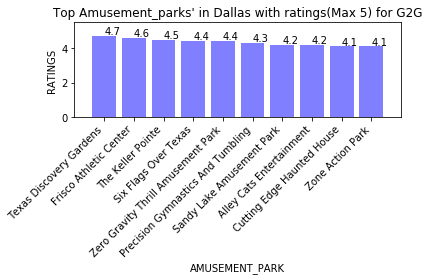

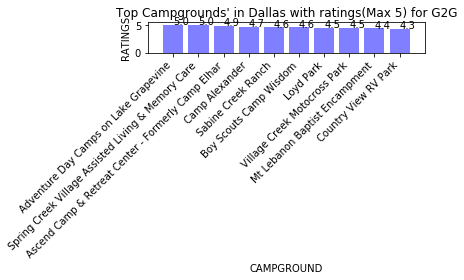

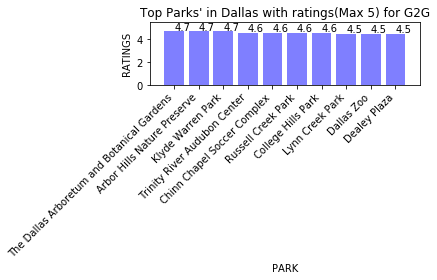

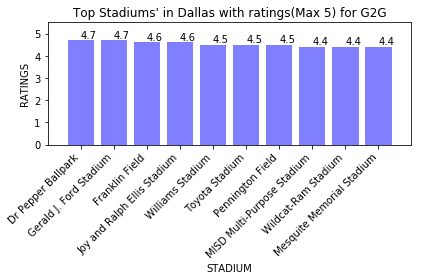

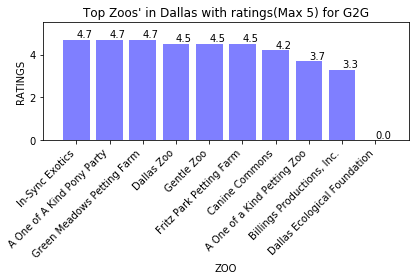

In [72]:
for acty in Acty:
    Df_A = Df[Df["Type"] == acty]
    Df_A = Df_A.sort_values(by=["Rating"],ascending=False)
    Df_A = Df_A[:10]
    #print(Df_A)
    x_axis = np.arange(len(Df_A["Place"]))
    plt.bar(x_axis, Df_A["Rating"],align="center",color="blue",alpha = 0.5)
    plt.xlim(-1,10)
    plt.ylim(0,5.5)
    plt.xlabel(acty.upper())
    plt.ylabel("Ratings".upper())
    plt.title(f"Top {acty.capitalize()}s' in {City} with ratings(Max 5) for G2G")
    plt.xticks(x_axis, Df_A["Place"],rotation=45,horizontalalignment="right")
    for a,b in zip(x_axis, Df_A["Rating"]):
        plt.text(a, b+.1, str(b))
    plt.tight_layout()
    plt.savefig(f'Results/Top_{acty.capitalize()}s_of_{City}_with_Ratings_G2G.jpg')
    plt.show()    